In [1]:
import Hokusai
import PyPlot

In [2]:
# variables/parameters
img = 1
sigma = 50
tau = 60
symmetrize = false #reversible MC?
method = :scaling #which method should be used for optimisation
ratematrix = false #select highest/lowest eigenvalue

false

In [6]:
function getSchur(image)
    # filter and prepare data
    data = Hokusai.filterdata(Hokusai.DATA, image)
    ts = Hokusai.TimeSeries(data)
    # get transition matrix
    grid = Hokusai.points(ts)
    P = Hokusai.transitionmatrix(ts, sigma, tau, grid, symmetrize)
    # get stationary distribution
    pi = Hokusai.stationaryDistr(P, ratematrix)
    Pw = diagm(sqrt.(pi))*P*diagm(1./sqrt.(pi)) # rescale to keep markov property
    S = schurfact!(Pw);
    S, P
end
Sw, P = getSchur(img);

In [6]:
#upper triangulat Schurform - no 1x1/2x2 blocks on diagonal
Sw[:Schur]

2111×2111 Array{Float64,2}:
 1.0  1.69504e-16  -1.34874e-16  -4.78749e-17  …   3.92041e-18  -1.28838e-17
 0.0  0.926805     -0.0181022     0.00592081      -1.29973e-10  -3.86452e-10
 0.0  0.0           0.849133      0.000781764     -2.53126e-10   4.38017e-9 
 0.0  0.0           0.0           0.835573        -2.17143e-10   2.16002e-9 
 0.0  0.0           0.0           0.0              1.58093e-9    1.1341e-9  
 0.0  0.0           0.0           0.0          …   1.27942e-9   -3.88283e-10
 0.0  0.0           0.0           0.0             -5.30686e-10   3.86273e-9 
 0.0  0.0           0.0           0.0             -1.05962e-9   -5.80782e-9 
 0.0  0.0           0.0           0.0             -4.20277e-9    1.99042e-9 
 0.0  0.0           0.0           0.0             -1.23894e-9    2.96763e-10
 0.0  0.0           0.0           0.0          …  -7.95975e-10   2.43055e-10
 0.0  0.0           0.0           0.0             -3.22532e-9    5.59833e-9 
 0.0  0.0           0.0           0.0           

In [13]:
#block entries of schurform - subdiagonal elements
unique(diag(Sw[:Schur][2:end,1:end-1]))

891-element Array{Float64,1}:
  0.0        
 -0.000832422
 -0.000665796
 -3.75912e-5 
  6.76326e-6 
  1.75047e-5 
 -5.27184e-7 
 -3.86905e-6 
 -3.13606e-6 
  4.74034e-8 
  2.88176e-6 
  5.98117e-7 
 -3.4196e-7  
  ⋮          
 -1.26622e-18
  3.66418e-19
  1.49859e-18
  4.72082e-19
 -6.03886e-19
  9.43607e-19
  7.62256e-19
  4.33574e-19
 -2.0903e-19 
  1.48021e-18
  7.90836e-19
  1.73355e-19

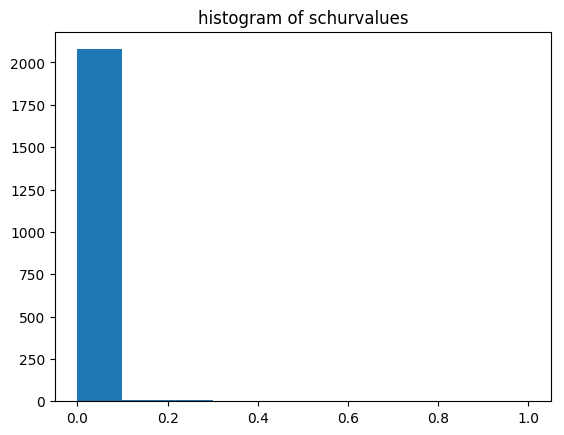

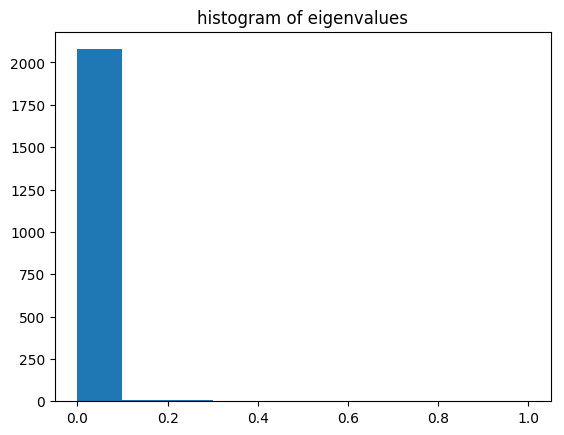

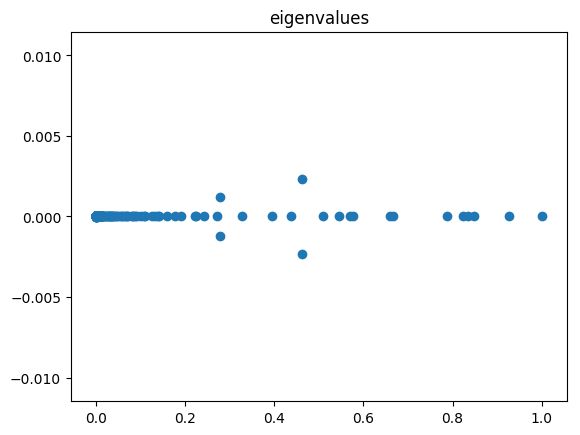

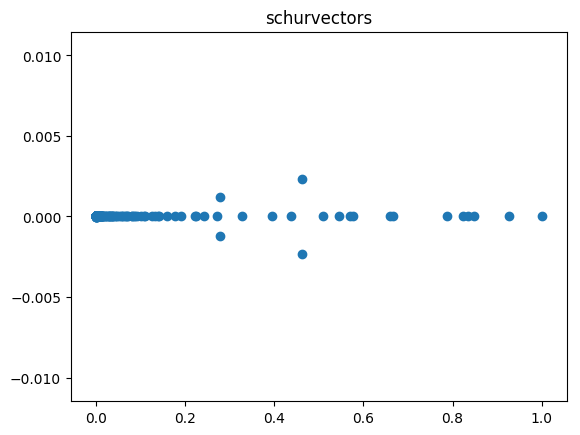

/home/lara/.local/lib/python2.7/site-packages/numpy/lib/function_base.py:754: ComplexWarning: Casting complex values to real discards the imaginary part
  tmp_a_data = tmp_a.astype(float)
/home/lara/.local/lib/python2.7/site-packages/numpy/lib/function_base.py:760: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = tmp_a.astype(np.intp)
/home/lara/.local/lib/python2.7/site-packages/matplotlib/transforms.py:814: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/home/lara/.local/lib/python2.7/site-packages/matplotlib/transforms.py:2037: ComplexWarning: Casting complex values to real discards the imaginary part
  x, y = float(x), float(y)


In [5]:
# difference between schur- and eigenvalues
PyPlot.plt[:hist](Sw[:values])
PyPlot.title("histogram of schurvalues")
Ew = eigfact(P)
PyPlot.figure()
PyPlot.plt[:hist](Ew[:values])
PyPlot.title("histogram of eigenvalues")
PyPlot.figure()
real = [x.re for x in Ew[:values]]
imaginary = [x.im for x in Ew[:values]]
PyPlot.scatter(real, imaginary)
PyPlot.title("eigenvalues")
PyPlot.figure()
real = [x.re for x in Sw[:values]]
imaginary = [x.im for x in Sw[:values]]
PyPlot.scatter(real, imaginary)
PyPlot.title("schurvectors")
Sw[:values]; #schurvalues
Sw[:Schur]; #upper triangular matrix

In [27]:
# difference between schur- and eigenvalues
#Sw[:values] .== Ew[:values]
print(unique(abs.(Sw[:values] - Ew[:values]) .< 1e-8))
print(unique(abs.(diag(Sw[:Schur]) - Sw[:values]) .< 1e-2))

Bool[true]Bool[true]

In [10]:
# number of eigenvalues in comparison to dimension of P
for i in 1:8
    println("image ",i)
    Sw, P = getSchur(i)
    #print(Sw[:Schur])
    println("size of P: ", size(P))
    println("number of different eigenvalues: ", length(unique(Sw[:values]))) # -> P diagonalizable?
    # number of complex eigenvalues?
    println("number of complex eigenvalues: ", sum(diag(Sw[:Schur][2:end,1:end-1]) .!= 0))
end

image 1
size of P: (2111, 2111)
number of different eigenvalues: 2111
number of complex eigenvalues: 891
image 2
size of P: (1986, 1986)
number of different eigenvalues: 1986
number of complex eigenvalues: 832
image 3
size of P: (2132, 2132)
number of different eigenvalues: 2132
number of complex eigenvalues: 869
image 4
size of P: (1967, 1967)
number of different eigenvalues: 1967
number of complex eigenvalues: 784
image 5
size of P: (1956, 1956)
number of different eigenvalues: 1956
number of complex eigenvalues: 763
image 6
size of P: (1956, 1956)
number of different eigenvalues: 1956
number of complex eigenvalues: 764
image 7
size of P: (2212, 2212)
number of different eigenvalues: 2212
number of complex eigenvalues: 883
image 8
size of P: (1949, 1949)
number of different eigenvalues: 1949
number of complex eigenvalues: 770


In [39]:
function scatterEigenvalues(image)
    Sw, P = getSchur(image)
    real = [x.re for x in Sw[:values]]
    imaginary = [x.im for x in Sw[:values]]
    real, imaginary
end

scatterEigenvalues (generic function with 1 method)

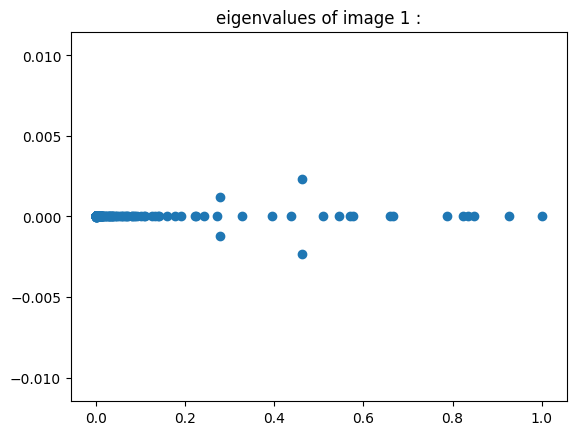

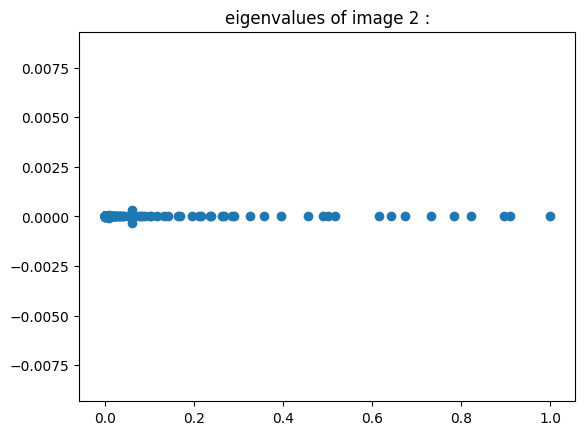

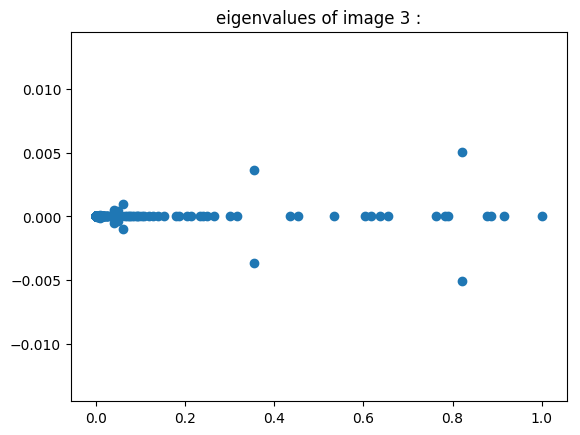

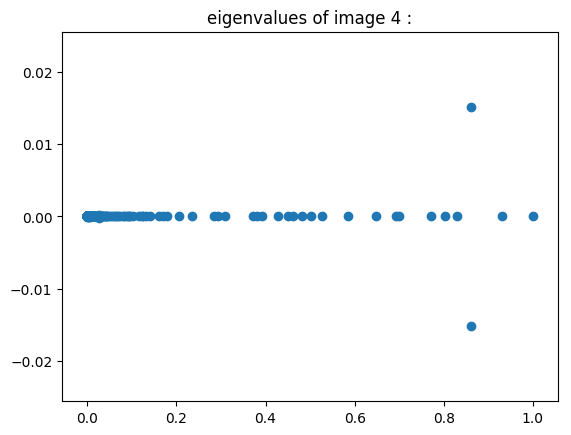

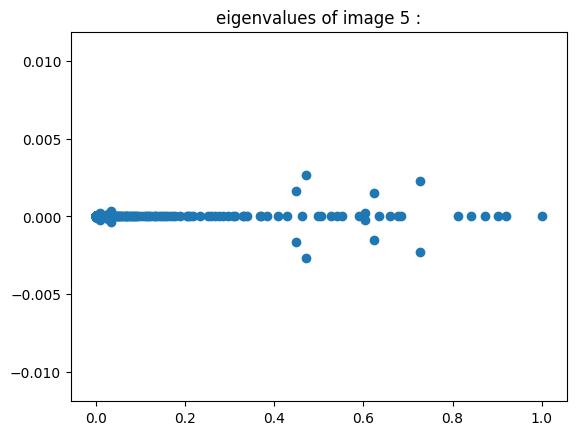

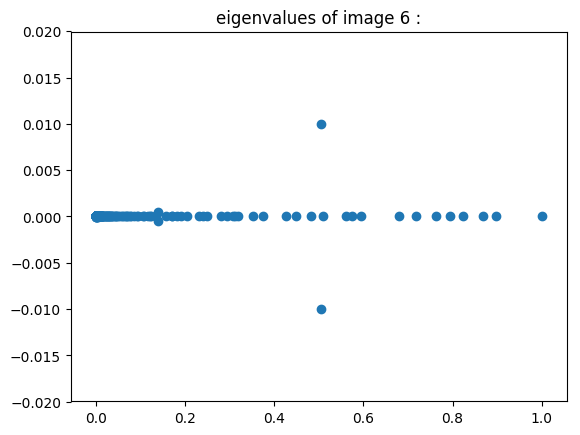

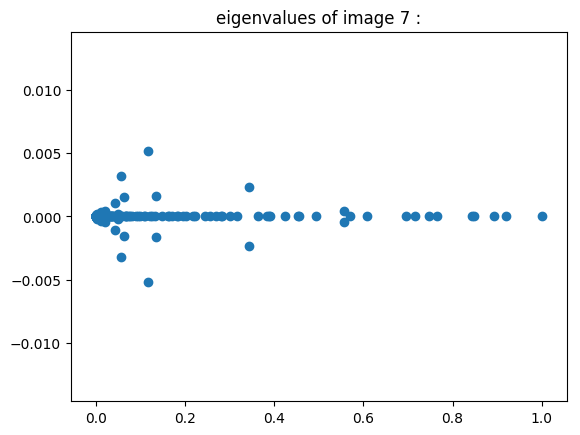

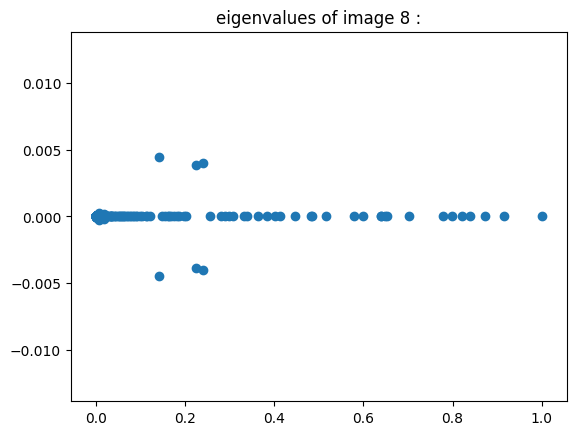

In [47]:
# plot all eigenvalues per image
for i = 1:8
    r, im = scatterEigenvalues(i)
    PyPlot.figure()
    PyPlot.scatter(r, im)
    PyPlot.title(string("eigenvalues of image ",i," :"))
end

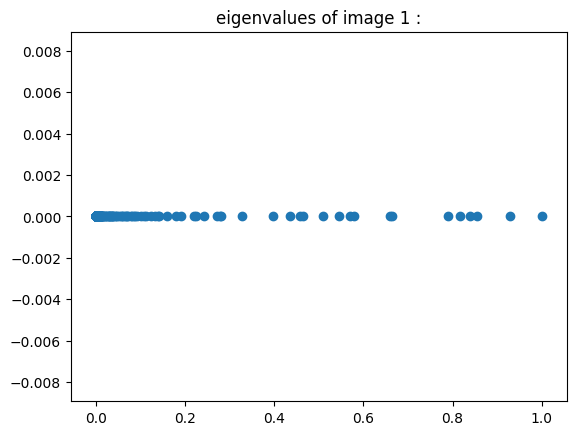

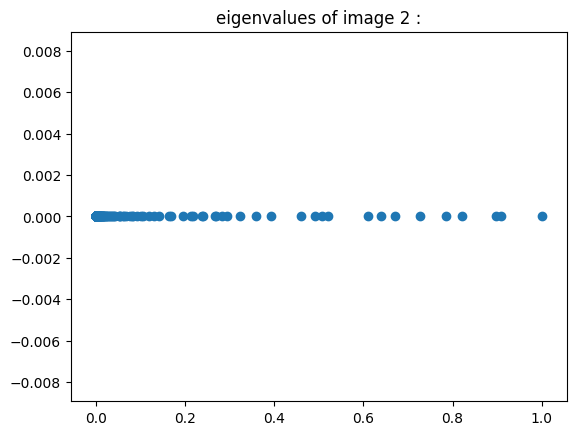

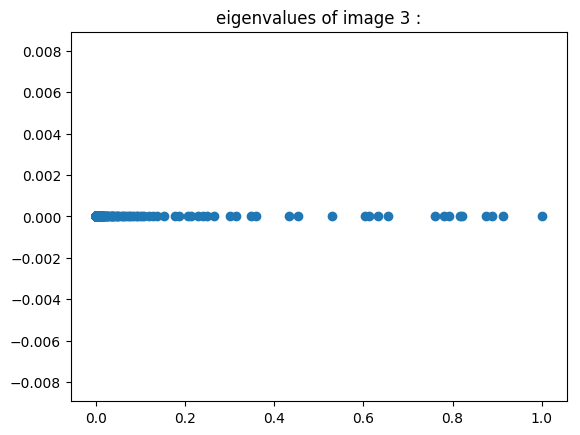

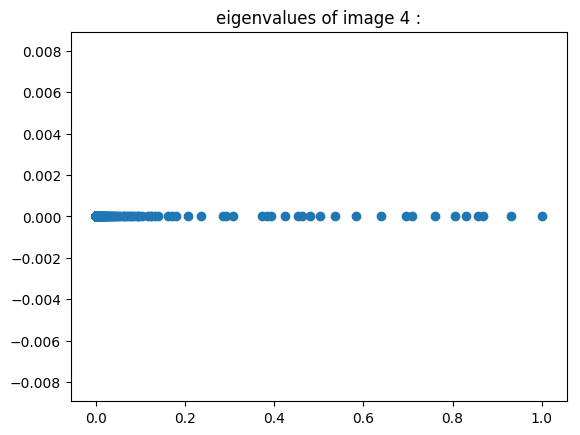

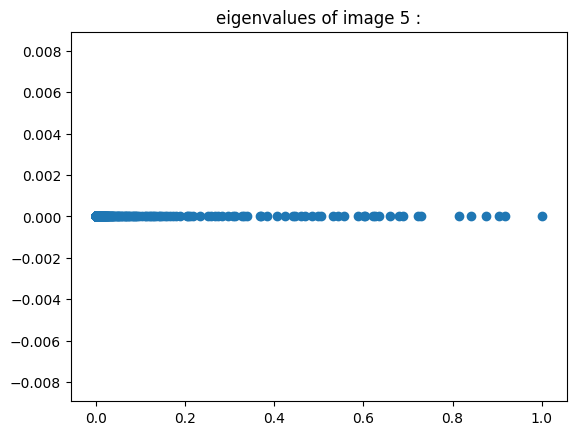

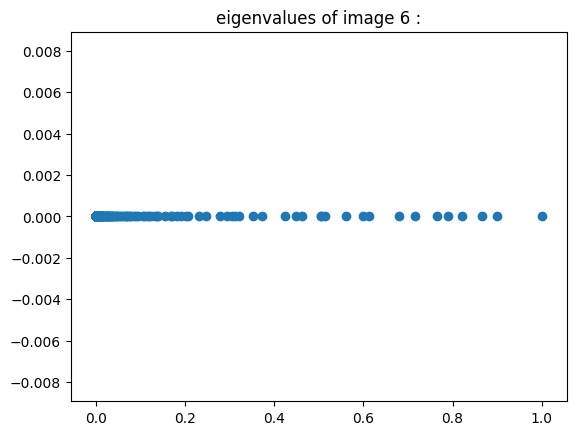

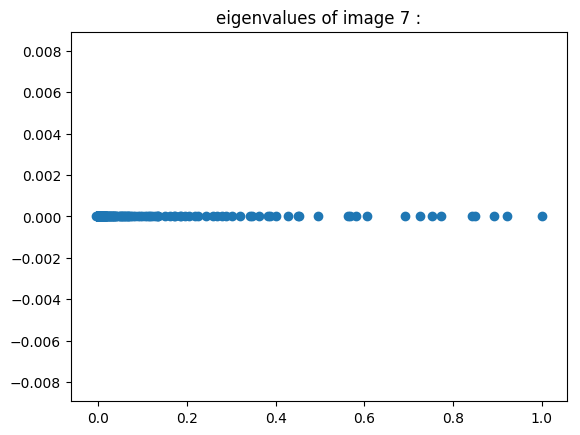

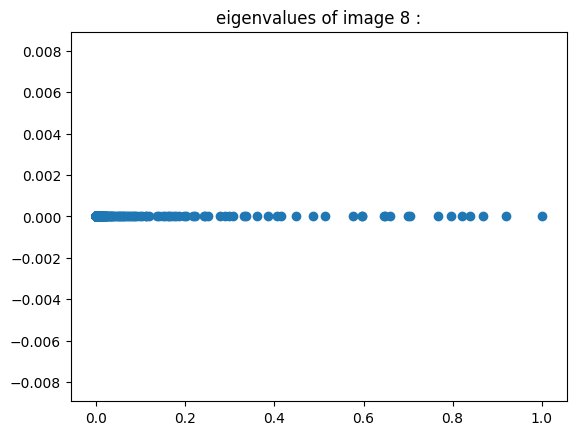

In [50]:
symmetrize = true
# plot all eigenvalues of symmetrized P per image
for i = 1:8
    r, im = scatterEigenvalues(i)
    PyPlot.figure()
    PyPlot.scatter(r, im)
    PyPlot.title(string("eigenvalues of image ",i," :"))
end